# Task 1

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split ,RandomizedSearchCV , GridSearchCV 
from sklearn.metrics import confusion_matrix , classification_report  , f1_score , recall_score , precision_score

In [2]:
# Load Data
data = pd.read_csv('../code/Training_set_heart.csv')
test_set = pd.read_csv('../code/Testing_set_heart.csv')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


## Basic Exploratory Data Analysis (EDA)

In [3]:
data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.561321,0.688679,0.915094,132.127358,247.830189,0.165094,0.537736,148.995283,0.330189,1.008491,1.448113,0.783019,2.320755,0.542453
std,9.493376,0.464130,1.008193,17.440700,53.199877,0.372144,0.527437,23.332645,0.471394,1.141681,0.601850,1.066551,0.646495,0.499374
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,151.500000,0.000000,0.650000,2.000000,0.000000,2.000000,1.000000
75%,61.250000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,165.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Checking whether any null value
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Examine to the Training_set_heart.csv and Testing_set_heart.csv, there exists some columns having invalid value for some rows.
# Drop the invalid data

# Drop the rows of having invalid ca value
data = data[data['ca'] < 4]
test_set = test_set[test_set['ca'] < 4]

# Drop the rows of having invalid thal value
data = data[data['thal'] > 0]
test_set = test_set[test_set['thal'] > 0]

print('Shape of the data is ', data.shape)

Shape of the data is  (206, 14)


In [6]:
print('Shape of the data is ', test_set.shape)
test_set.head()

Shape of the data is  (90, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,46,0,0,138,243,0,0,152,1,0.0,1,0,2
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2
3,44,0,2,108,141,0,1,175,0,0.6,1,0,2
4,47,1,2,108,243,0,1,152,0,0.0,2,0,2


In [7]:
# Identify the categorical columns of independent variables (dependent variable is 'target')
# sex, chest pain type, fasting blood sugar > 120, resting electrocardiographic results, exercise-induced angina, thalassemia status
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']

# Replace the values in the categorical columns to their medical meaning for easier interpretation
data['sex'] = data.sex.replace({0:'male', 1:'female'})
data['cp'] = data.cp.replace({0:'typical angina', 1:'atypical angina', 2:'non-angina', 3:'asymptomatic'})
data['fbs'] = data.fbs.replace({0:'lower than 120 mg/dl', 1:'higher than 120 mg/dl'})
data['restecg'] = data.restecg.replace({0:'normal', 1:'stt abnormality', 2:'lv hypertrophy'})
data['exang'] = data.exang.replace({0:'True', 1:'False'})
data['thal'] = data.thal.replace({1:'normal', 2:'fixed defect', 3:'reversible defect'})

test_set['sex'] = test_set.sex.replace({0:'male', 1:'female'})
test_set['cp'] = test_set.cp.replace({0:'typical angina', 1:'atypical angina', 2:'non-angina', 3:'asymptomatic'})
test_set['fbs'] = test_set.fbs.replace({0:'lower than 120 mg/dl', 1:'higher than 120 mg/dl'})
test_set['restecg'] = test_set.restecg.replace({0:'normal', 1:'stt abnormality', 2:'lv hypertrophy'})
test_set['exang'] = test_set.exang.replace({0:'True', 1:'False'})
test_set['thal'] = test_set.thal.replace({1:'normal', 2:'fixed defect', 3:'reversible defect'})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       206 non-null    int64  
 1   sex       206 non-null    object 
 2   cp        206 non-null    object 
 3   trestbps  206 non-null    int64  
 4   chol      206 non-null    int64  
 5   fbs       206 non-null    object 
 6   restecg   206 non-null    object 
 7   thalach   206 non-null    int64  
 8   exang     206 non-null    object 
 9   oldpeak   206 non-null    float64
 10  slope     206 non-null    int64  
 11  ca        206 non-null    int64  
 12  thal      206 non-null    object 
 13  target    206 non-null    int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 24.1+ KB


In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,female,non-angina,124,255,higher than 120 mg/dl,stt abnormality,175,True,0.0,2,2,fixed defect,1
1,68,male,non-angina,120,211,lower than 120 mg/dl,normal,115,True,1.5,1,0,fixed defect,1
2,46,female,typical angina,120,249,lower than 120 mg/dl,normal,144,True,0.8,2,0,reversible defect,0
3,60,female,typical angina,130,253,lower than 120 mg/dl,stt abnormality,144,False,1.4,2,1,reversible defect,0
4,43,female,typical angina,115,303,lower than 120 mg/dl,stt abnormality,181,True,1.2,1,0,fixed defect,1


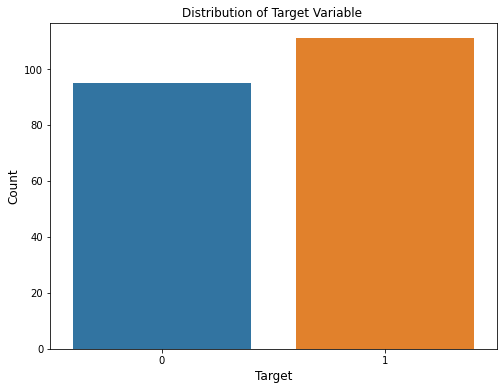

<Figure size 720x576 with 0 Axes>

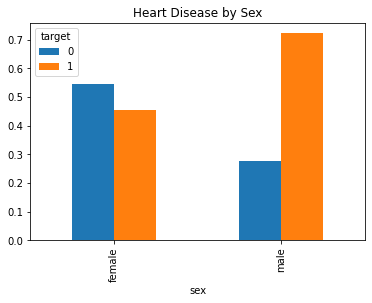

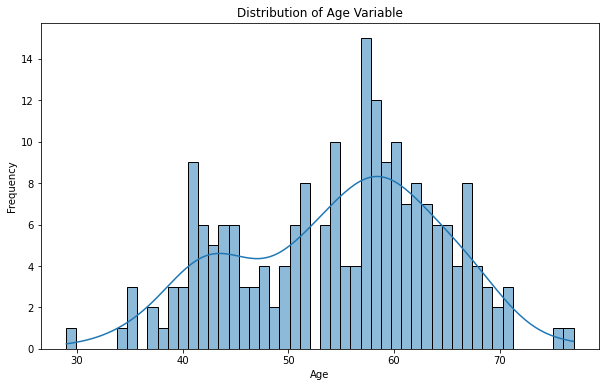

In [10]:
# Graph 1 : 
plt.figure(figsize=(8,6))
sns.countplot(data['target'])
plt.title('Distribution of Target Variable ', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Graph 2 :
plt.figure(figsize=(10,8))
gender_heart = pd.crosstab(data['sex'], data['target'],normalize='index')
gender_heart.plot(kind='bar')
plt.title('Heart Disease by Sex')
plt.show()

# Graph 3:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=50, kde=True)
plt.title('Distribution of Age Variable')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

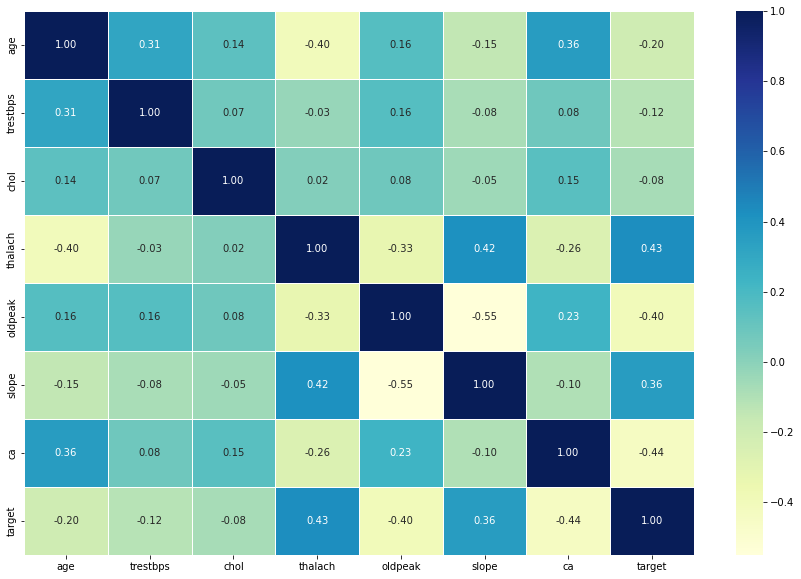

In [11]:
# Correlation between features
corr_mat = data.corr()
fig , ax = plt.subplots(figsize = (15 , 10))
ax = sns.heatmap(corr_mat , annot=True , linewidths=0.5 , fmt="0.2f" , cmap="YlGnBu")

In [12]:
# Seperate the input and target features of the data
y = data['target']
X = data.drop('target', axis=1)

In [13]:
#Split data into Train and Validation sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [14]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca' ]

# Encoding Categorical Features using Preprocessor
preprocessor = ColumnTransformer([("numerical", "passthrough", numerical_features), 
                                  ("categorical", OneHotEncoder(sparse=False, handle_unknown="ignore"), categorical_features)])

# Train preprocessor
preprocessor.fit(X_train)

# Get the list of categories generated by the process
ohe_categories = preprocessor.named_transformers_["categorical"].categories_

# Create nice names for our one hot encoded features
new_ohe_features = [f"{col}__{val}" for col, vals in zip(categorical_features, ohe_categories) for val in vals]

# Create a new list with all names of features
all_features = numerical_features + new_ohe_features

# Save processed data
X_train = pd.DataFrame(preprocessor.transform(X_train), columns=all_features)
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=all_features)
test_set = pd.DataFrame(preprocessor.transform(test_set), columns=all_features)

X_train.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex__female,sex__male,cp__asymptomatic,...,fbs__higher than 120 mg/dl,fbs__lower than 120 mg/dl,restecg__lv hypertrophy,restecg__normal,restecg__stt abnormality,exang__False,exang__True,thal__fixed defect,thal__normal,thal__reversible defect
0,64.0,170.0,227.0,155.0,0.6,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,44.0,118.0,242.0,149.0,0.3,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,45.0,115.0,260.0,185.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,44.0,112.0,290.0,153.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,62.0,140.0,394.0,157.0,1.2,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


# Task 2

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Select and compare a sets of classification algorithms for finding algorithm that have best F1 score

# Model initialization
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
svc_model = SVC()

# Fitting models to train data
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

# Make predictions on test data
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
svc_pred = svc_model.predict(X_test)

In [16]:
# Evaluate the model using F1 Score

print('Accuracy of Logistic Regression: ', accuracy_score(lr_pred, y_test))
print('Accuracy of Decision Tree Classifier: ', accuracy_score(dt_pred, y_test))
print('Accuracy of Random Forest Classifier: ', accuracy_score(rf_pred, y_test))
print('Accuracy of Gradient Boosting Classifier: ', accuracy_score(gb_pred, y_test))
print('Accuracy of Support Vector Classification: ', accuracy_score(svc_pred, y_test))

print('\nF1 Score of Logistic Regression: ', f1_score(lr_pred, y_test))
print('F1 Score of Decision Tree Classifier: ', f1_score(dt_pred, y_test))
print('F1 Score of Random Forest Classifier: ', f1_score(rf_pred, y_test))
print('F1 Score of Gradient Boosting Classifier: ', f1_score(gb_pred, y_test))
print('F1 Score of Support Vector Classification: ', f1_score(svc_pred, y_test))


Accuracy of Logistic Regression:  0.7619047619047619
Accuracy of Decision Tree Classifier:  0.6666666666666666
Accuracy of Random Forest Classifier:  0.7142857142857143
Accuracy of Gradient Boosting Classifier:  0.7380952380952381
Accuracy of Support Vector Classification:  0.6428571428571429

F1 Score of Logistic Regression:  0.8000000000000002
F1 Score of Decision Tree Classifier:  0.7083333333333334
F1 Score of Random Forest Classifier:  0.7391304347826089
F1 Score of Gradient Boosting Classifier:  0.7659574468085107
F1 Score of Support Vector Classification:  0.7058823529411765


In [17]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        17
           1       0.80      0.80      0.80        25

    accuracy                           0.76        42
   macro avg       0.75      0.75      0.75        42
weighted avg       0.76      0.76      0.76        42



# Task 3

In [18]:
import shap
shap.initjs()

masker = shap.maskers.Independent(data=test_set)

# Use SHAP Explainer to derive SHAP Values for Logistic Regression Model
explainer = shap.Explainer(lr_model, masker=masker)

# Evaluate SHAP values
shap_values = explainer(test_set)

shap_values

.values =
array([[-3.58903593e-02, -5.28088697e-02, -8.11650237e-05, ...,
         3.78011084e-01,  2.67930281e-03,  3.25529501e-01],
       [-4.04143542e-02, -5.28088697e-02,  3.32776597e-03, ...,
         3.78011084e-01,  2.67930281e-03,  3.25529501e-01],
       [ 2.29215740e-02, -2.05009105e-01, -1.46908693e-02, ...,
         3.78011084e-01,  2.67930281e-03,  3.25529501e-01],
       ...,
       [ 9.34958941e-03,  7.17185959e-02,  1.37980540e-03, ...,
         3.78011084e-01,  2.67930281e-03,  3.25529501e-01],
       [ 4.55415484e-02, -3.43372956e-01, -4.00143567e-02, ...,
         3.78011084e-01,  2.67930281e-03,  3.25529501e-01],
       [ 1.83975792e-02,  7.17185959e-02, -4.73192088e-02, ...,
         3.78011084e-01,  2.67930281e-03,  3.25529501e-01]])

.base_values =
array([0.25735953, 0.25735953, 0.25735953, 0.25735953, 0.25735953,
       0.25735953, 0.25735953, 0.25735953, 0.25735953, 0.25735953,
       0.25735953, 0.25735953, 0.25735953, 0.25735953, 0.25735953,
       0.2573595

# Task 4

In [19]:
test_set.head(1)

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex__female,sex__male,cp__asymptomatic,...,fbs__higher than 120 mg/dl,fbs__lower than 120 mg/dl,restecg__lv hypertrophy,restecg__normal,restecg__stt abnormality,exang__False,exang__True,thal__fixed defect,thal__normal,thal__reversible defect
0,46.0,138.0,243.0,152.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


Predicted Value: 1


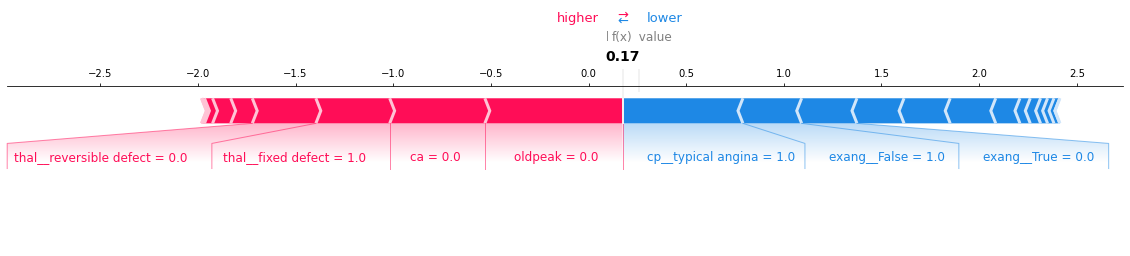

In [20]:
# Plot the SHAP force plot for the first rows of test data

print(f"Predicted Value: {lr_model.predict(test_set)[0]}")
shap.force_plot(shap_values.base_values[0],
                shap_values.values[0],
                test_set.iloc[[0]],
                matplotlib=True)


# Task 5

In [21]:
# Plot a SHAP force plot for the first row of test data.
shap.initjs()
shap.force_plot(shap_values.base_values,
                shap_values.values,
                test_set)

# Task 6

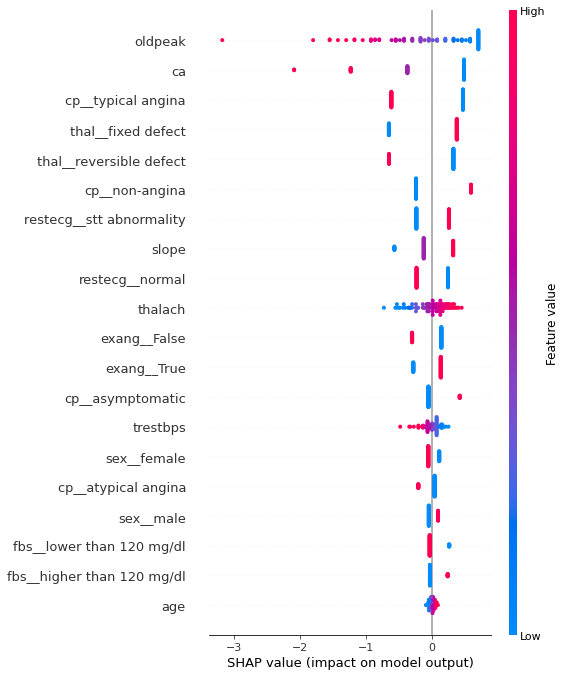

In [22]:
# Plot a SHAP summary plot using all the features in the data
shap.summary_plot(shap_values.values, test_set)

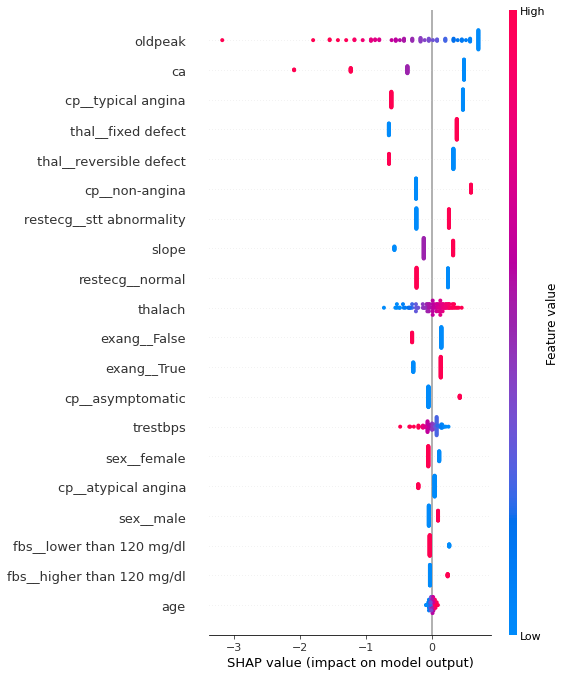

In [23]:
shap.summary_plot(shap_values, feature_names=all_features)

# Task 7

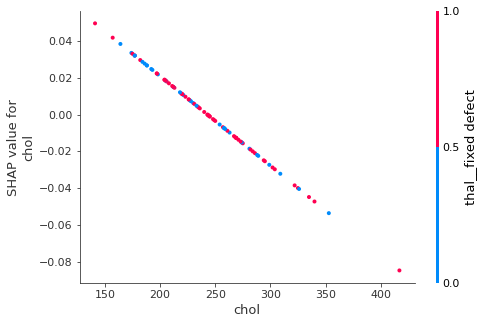

In [24]:
# Plot a dependence plot to show the effect of ‘chol’ across the whole dataset
shap.dependence_plot("chol", shap_values.values, test_set)

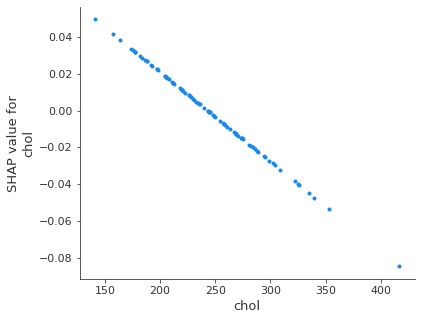

In [25]:
shap.dependence_plot("chol", shap_values.values, test_set, interaction_index=None)

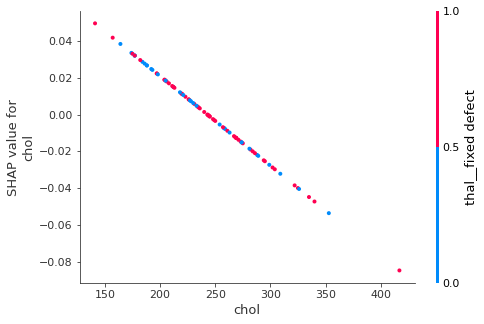

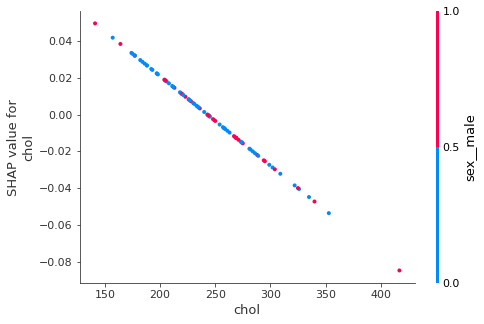

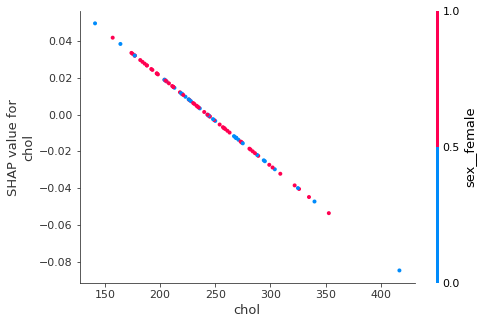

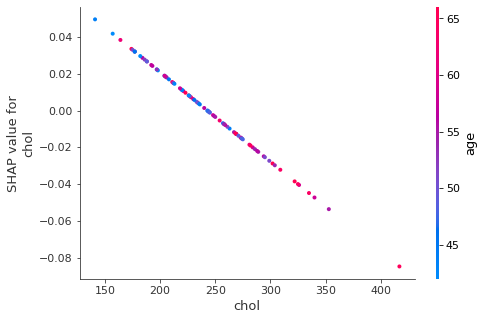

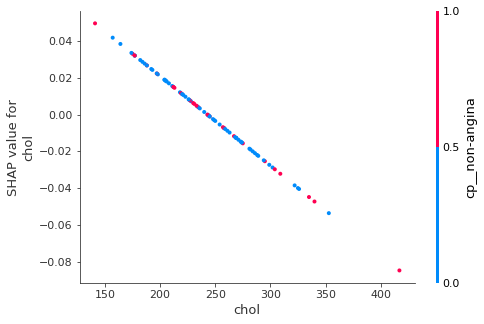

In [26]:
# we can use shap.approximate_interactions to guess which features
# may interact with age
inds = shap.approximate_interactions("chol", shap_values.values, test_set)

# make plots colored by each of the top five possible interacting features
for i in range(5):
    shap.dependence_plot("chol", shap_values.values, test_set, interaction_index=inds[i])

# Task 8

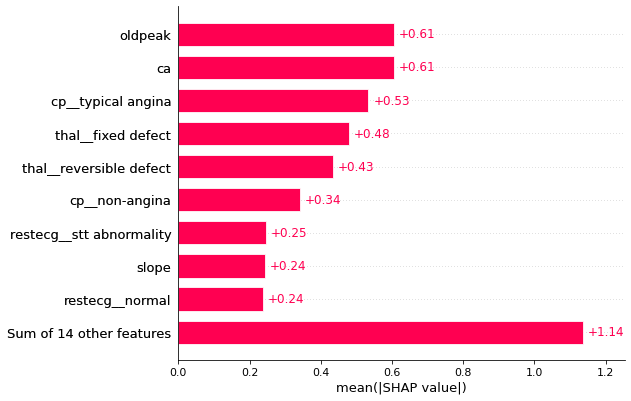

In [27]:
shap.plots.bar(shap_values)

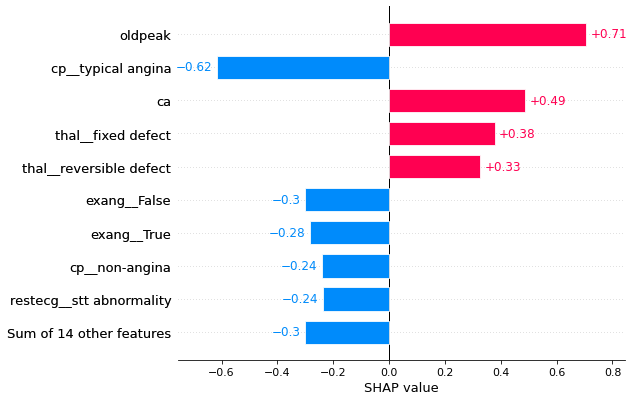

In [28]:
shap.plots.bar(shap_values[0])

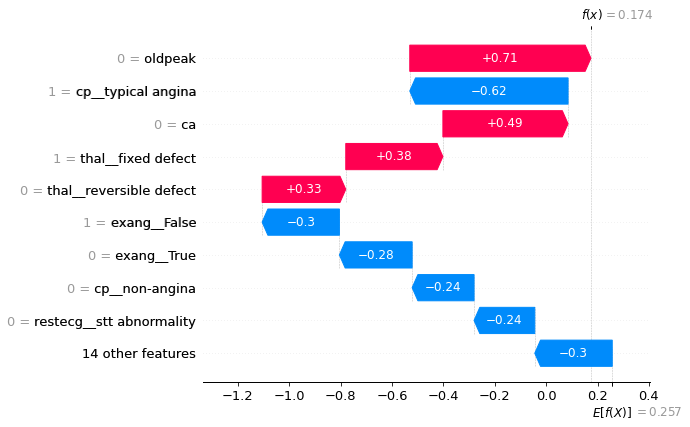

In [29]:
shap.plots.waterfall(shap_values[0])

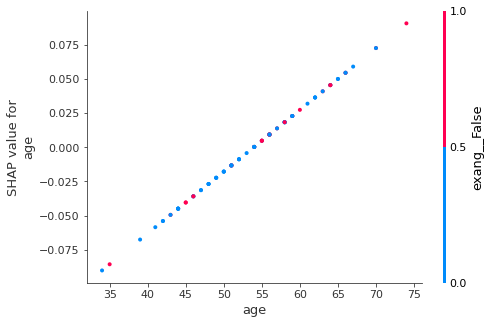

In [30]:
shap.dependence_plot("age", shap_values.values, test_set)

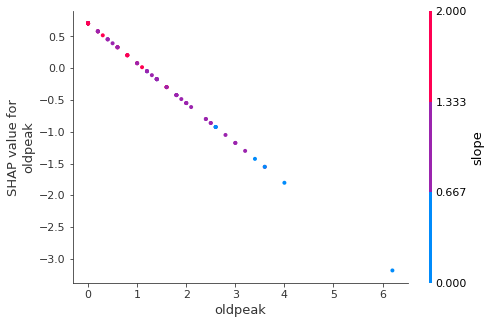

In [31]:
shap.dependence_plot("oldpeak", shap_values.values, test_set)